# COMP4431 - Data Mining 

Authors:
- Ethan Engel - ethan.engel@du.edu
- Heather Lemon - heather.lemon@du.edu
- Isaac McPadden - issac.mcpadden@du.edu
- Simran Kota - simran.kota@du.edu
- Spencer Tillman - spencer.tillman@du.edu

## Iris Species Jupyter Notebook
*Iris measurements were taken in centimeters (cm)*

The structure is as follows: 
## Table of Contents
> 1. [Load Dataset](#Load-Data-(Iris-Dataset))
> 2. [Exploratory Data Analysis](#EDA-(Exploratory-Data-Analysis))
    * 2.1. [Missing-Values](#Missing-Values)
    * 2.2. [Pandas Profile Report](#Pandas-Profile-Report)
    * 2.3. [Visualizing the Data](#Visualizing-the-Data)
        * 2.2.1 [Seaborn Pairplot](#Seaborn-Pairplot)
        * 2.2.2 [Metrics](#Metrics)
    * 2.4 [Exploratory Data Analysis Conclusion](#Exploratory-Data-Analysis-Conclusion)
> 3. [Clustering](#Clustering)
    * 3.1 [Elbow Plot](#Elbow-Plot)
    * 3.2 [Without PCA](#Without-PCA)
    * 3.3 [PCA Analysis Part I](#Principal-Componet-Analysis-Part-I)
    * 3.4 [Basic K-Means Model](#Basic-K-Means-Model) 
    * 3.5 [Confusion Matrix](#Confusion-Matrix)
    * 3.6 [Basic K-Means with PCA](#Basic-K-Means-with-PCA)
    * 3.7 [Principle Component Analysis](#Principle-Component-Analysis)
    * 3.8 [HeatMap](#HeatMap)
    * 3.9 [Hierarchical Clustering](#Hierarchical-Clustering)
        * 3.9.1 [Hierarchical Cluster of Iris Species](#Hierarchical-Cluster-of-Iris-Species)
    * 3.10 [A More Readable Dendrogram](#A-More-Readable-Dendrogram)
    * 3.11 [Agglomerative Clustering](#Agglomerative-Clustering)
> 4. [Cluster Conclusion](#Cluster-Conclusion)


### Libraries

In [116]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from numpy import linalg
from pandas_profiling import ProfileReport
import pandas as pd
import seaborn as sns
import plotly.express as px
import yellowbrick as yb


### Load Data (Iris Dataset)

In [143]:
irisdf = datasets.load_iris(as_frame=True)
iris = irisdf.data
iris['species'] = irisdf.target.map(lambda x: irisdf.target_names[x])
# drop cm from column name
iris.rename(columns={'sepal width (cm)': 'sepal width', 'sepal length (cm)':'sepal length', 
                       'petal length (cm)':'petal length', 'petal width (cm)': 'petal width'}, inplace=True)
species_list = list(iris.species.unique())

### EDA (Exploratory Data Analysis)

In [144]:
print ("Target Names: " ,irisdf.target_names)

Target Names:  ['setosa' 'versicolor' 'virginica']


We have 3 unique target values

In [145]:
# first dimension = (ROWS) i.e. number of observations, second dimensions = (COLUMNS) i.e. number of features
print("Shape of data: ", iris.shape)

Shape of data:  (150, 5)


Our dataset consists of 150 observations of 5 features, including the target

In [146]:
# print features list
features = iris.columns[:-1]
print(features)

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')


There are 4 unique features in our dataset

In [147]:
# lets take a peak at our data
iris.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [148]:
# lets check that the columns are all typed correctly
iris.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
species          object
dtype: object

All the columns are typed appropriately

### Missing Values

In [149]:
# Missing-Values
iris.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

There are no nulls in our data.

### Pandas Profile Report

In [150]:
# now we create a pandas profile
profile = ProfileReport(iris, title='Pandas Profile Report')
iris.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Although there is one duplicate row in our data, we will leave it in to maintain the balanced values for the target. We also see all our features being highly correlated with each other, which makes sense. Sepal width seems to be almost normally distributed, while the other features are more random. Petal length and petal width seem to have two distinct groupings of values.

### Visualizing the Data

#### Sepal Width vs Sepal Length

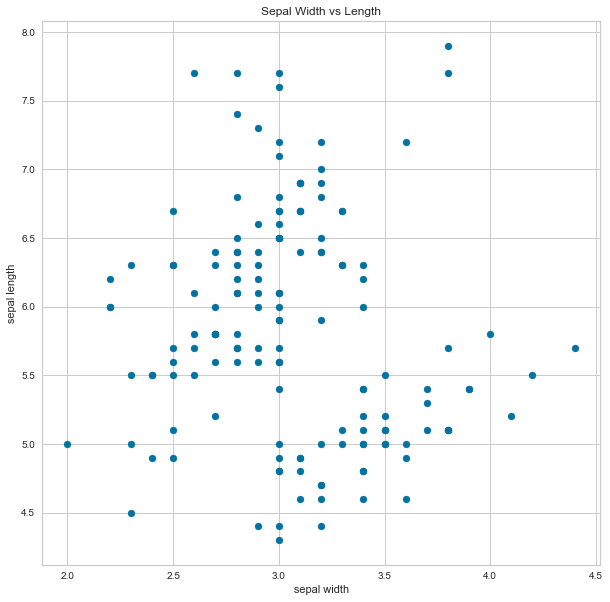

In [151]:
fig, axs = plt.subplots(figsize=(10, 10))
scatter = plt.scatter(iris['sepal width'], iris['sepal length'])
plt.xlabel('sepal width')
plt.ylabel('sepal length')
plt.title('Sepal Width vs Length')
plt.show()

This plot seems to have a weak positive correlation overall, but it almost seems like there are two separate groups. Lets add in the label/target and see if that gives us more info.

#### Speal Width vs Sepal Length by Category

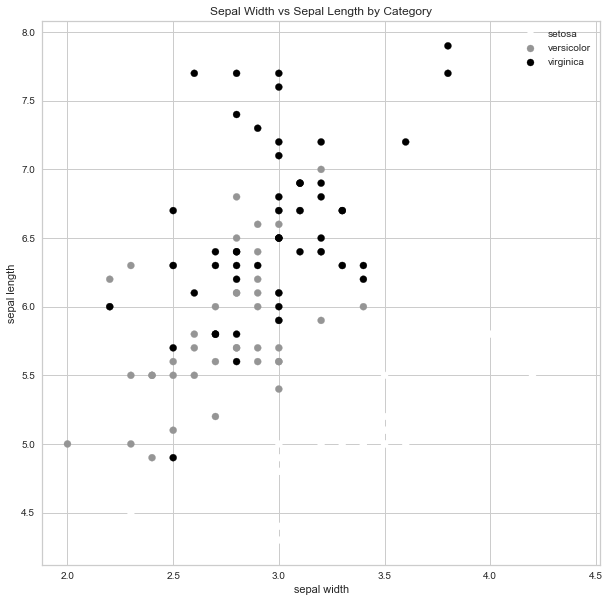

In [152]:
fig, axs = plt.subplots(figsize=(10, 10))
scatter = plt.scatter(iris['sepal width'], iris['sepal length'], c=irisdf.target)
plt.xlabel('sepal width')
plt.ylabel('sepal length')
plt.legend(handles=scatter.legend_elements()[0], labels=species_list)
plt.title('Sepal Width vs Sepal Length by Category')
plt.show()

Setosa is very seperated from the other two species. Versicolor and Virginaca are intermixed. Within each individual category we see a positive correlation.

#### Sepal Width vs Sepal Length vs Petal Length

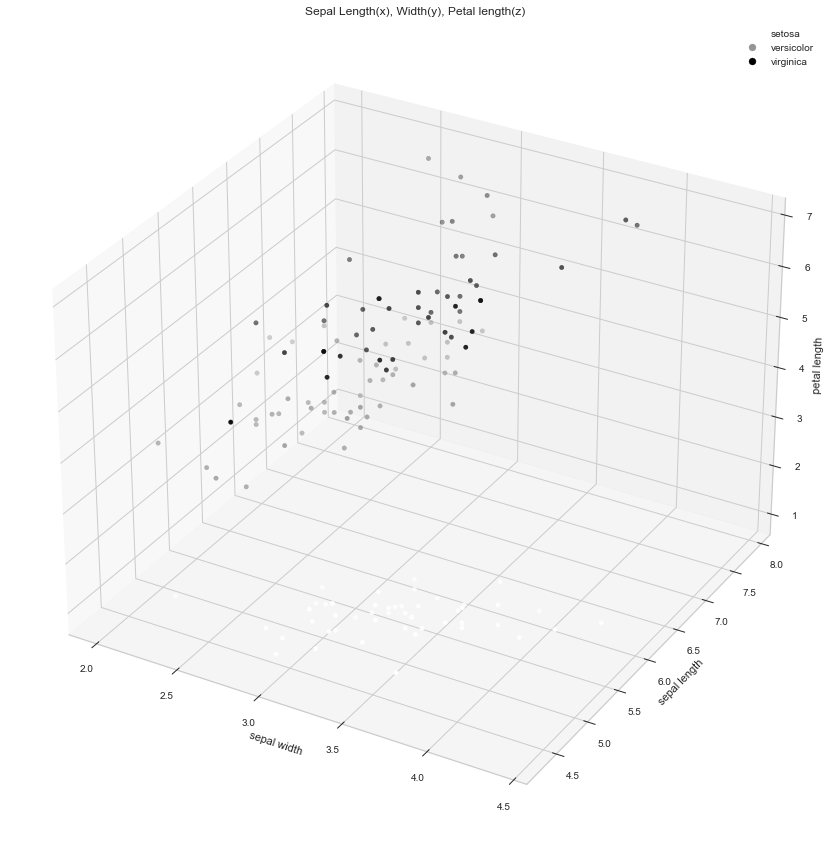

In [153]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

ax.scatter(iris['sepal width'], iris['sepal length'], 
           iris['petal length'], c=irisdf.target)

ax.set_xlabel('sepal width')
ax.set_ylabel('sepal length')
ax.set_zlabel('petal length')

plt.legend(handles=scatter.legend_elements()[0], labels=species_list)

plt.title('Sepal Length(x), Width(y), Petal length(z)')
plt.show()

There are no notable differences between this one and 2-D plot.


### Seaborn Pairplot

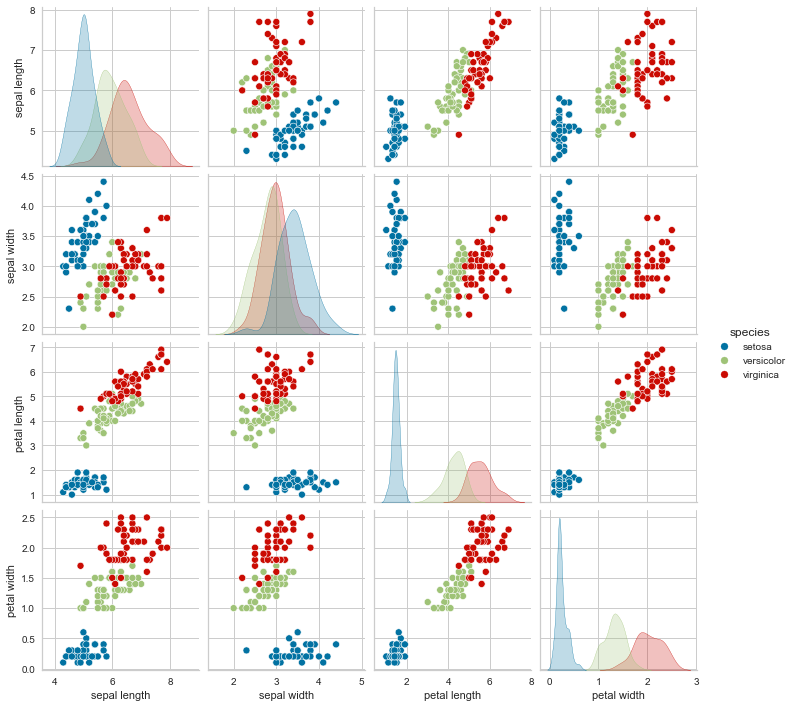

In [154]:
# Pairplot 
sns.pairplot(iris,hue='species')

### Metrics

#### Dot Product

In [155]:
np.dot(iris['sepal length'], iris['sepal width'])

2673.43

#### Norm

In [156]:
np.linalg.norm(iris['sepal length'])

72.27620631992247

In [157]:
np.linalg.norm(iris['sepal width'])

37.820629291433

#### Distance

In [158]:
dis = np.linalg.norm(iris['sepal length'] - iris['sepal width'])
print(dis)

36.1578483873142


### Exploratory Data Analysis Conclusion

As expected, there is a weak correlation in the sepal width vs sepal length data overall, but this becomes more interesting when we examine these attributes per category. Within each category, there is a much stronger positive correlation. Interestingly, the versicolor and virginica species are highly intermixed, and further investigation will be needed to determine how to differentiate between the two with unlabeled data.

## Clustering

In [159]:
X = iris.iloc[:,:4]
y = iris.iloc[:, 4:]

In [160]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [161]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Elbow Plot

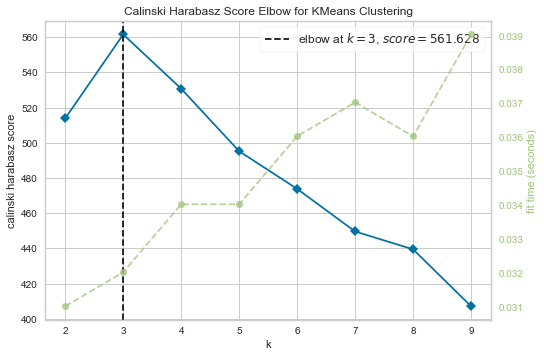

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 metric='calinski_harabasz')

In [162]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=0), X, k=(2,10), metric='calinski_harabasz')

#### Without PCA

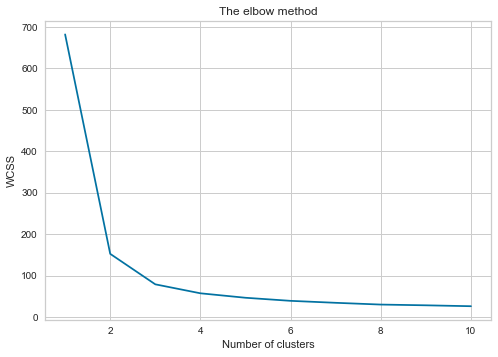

In [163]:
scores = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    scores.append(kmeans.inertia_)

plt.plot(range(1, 11), scores)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

The optimal k-value (identified by the "elbow" in the plot) is k=3.

### Principal Componet Analysis Part I

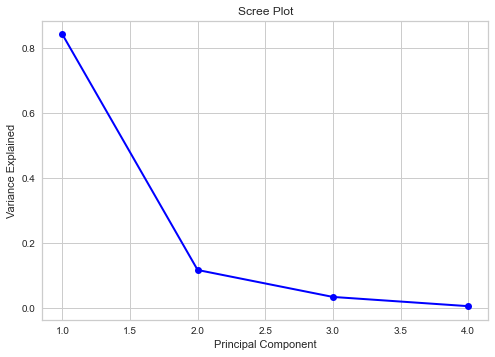

In [164]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler().fit_transform(X)
pca = PCA(n_components=4)
pca = pca.fit(scaled)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Using two principal componets explains more than 90% variance of the data. Adding a third component would explain less than ten percent variance of the data. 

In [165]:
reduced = PCA(n_components=2).fit_transform(scaled)
reduced = pd.DataFrame(reduced, columns=["PC1", "PC2"])
reduced = pd.concat([reduced, y], axis=1)
reduced.head()

,PC1,PC2,species
0,-0.630703,0.107578,setosa
1,-0.622905,-0.104260,setosa
2,-0.669520,-0.051417,setosa
3,-0.654153,-0.102885,setosa
4,-0.648788,0.133488,setosa


We have now reduced our DataFrame to reflect the PCA.

### Basic K-Means Model

In [166]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = km.fit_predict(X)

In [167]:
centroids = pd.DataFrame(km.cluster_centers_, columns=iris.columns[:-1])
centroids

,sepal length,sepal width,petal length,petal width
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.428000,1.462000,0.246000
2,6.850000,3.073684,5.742105,2.071053


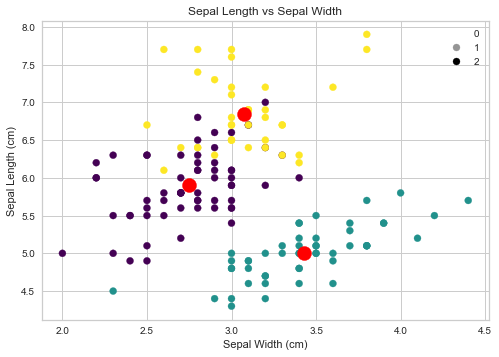

In [168]:
plt.scatter(X['sepal width'], X['sepal length'], c=y_pred, cmap='viridis')
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Sepal Length (cm)")
plt.title("Sepal Length vs Sepal Width")
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(y_pred)))
plt.scatter(centroids['sepal width'], centroids['sepal length'], c='red', s=200)
plt.show()

Let's compare the predicted clusters vs actual labels

### Confusion Matrix

In [169]:
from sklearn.metrics import confusion_matrix
mapping = {'versicolor': 0, 'virginica': 2, 'setosa': 1}
y_true = y.species.map(lambda x: mapping[x])
confusion_matrix(y_true, y_pred)

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]], dtype=int64)

In [170]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_true, y_pred)
acc

0.8933333333333333

In [171]:
prec = precision_score(y_true, y_pred, average='macro')
prec

0.9071873231465761

In [172]:
rec = recall_score(y_true, y_pred, average='macro')
rec

0.8933333333333332

In [173]:
f1 = f1_score(y_true, y_pred, average='macro')
f1

0.8917748917748917

The basic K-Means clustering model predicted Setosa points correctly, and Versicolor was fairly accurate as well (only 2 incorrect predictions). The model struggled with Virginica. However, our accuracy, precision, recall, and f1 scores are all ~90%, which indicates this is a strong model.

### Basic K-Means with PCA

In [174]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_red_pred = km.fit_predict(reduced.iloc[:, :-1])
cent_red = pd.DataFrame(km.cluster_centers_, columns=reduced.columns[:-1])
cent_red

,PC1,PC2
0,-0.618424,0.068585
1,0.556727,0.103688
2,0.150965,-0.122510


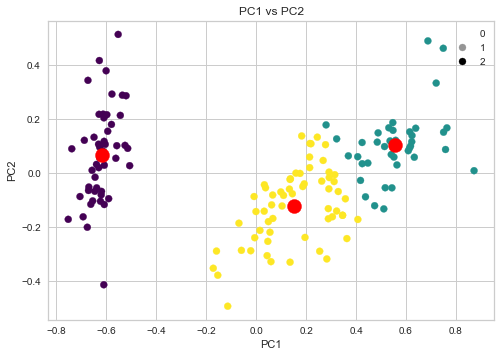

In [175]:
plt.scatter(reduced['PC1'], reduced['PC2'], c=y_red_pred, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PC1 vs PC2")
plt.legend(handles=scatter.legend_elements()[0], labels=list(set(y_red_pred)))
plt.scatter(cent_red['PC1'], cent_red['PC2'], c='red', s=200)
plt.show()

Lets look at predicted vs actual again

In [176]:
confusion_matrix(y_true, y_red_pred)

array([[ 0,  3, 47],
       [50,  0,  0],
       [ 0, 36, 14]], dtype=int64)

The basic K-Means clustering model predicted Setosa points correctly, and Versicolor was fairly accurate as well (only 2 incorrect predictions). The model struggled with Virginica. However, our accuracy, precision, recall, and f1 scores are all ~90%, which indicates this is a strong model.

## HeatMap

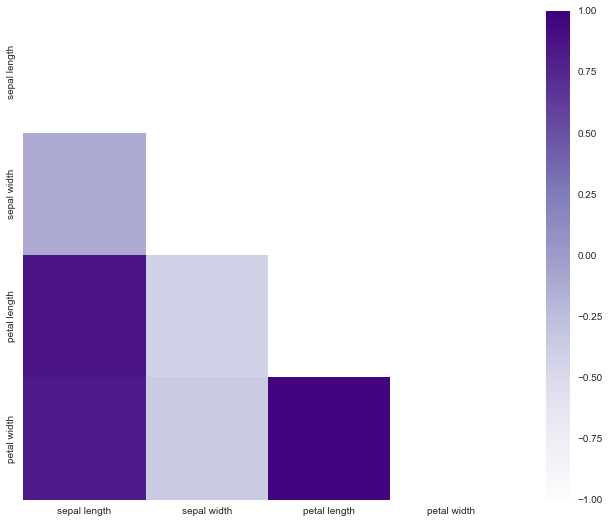

In [177]:
matrix_corr = iris.iloc[:,~iris.columns.isin(['Id','Species'])].corr()
mask = np.zeros_like(matrix_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(matrix_corr, mask=mask, cmap="Purples", vmin=-1, vmax=1, center=0, square=True);

## Hierarchical Clustering 

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. This hierarchy of clusters is represented as a tree (or dendrogram). The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample. 

[More Info on hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

### Hierarchical Cluster of Iris Species

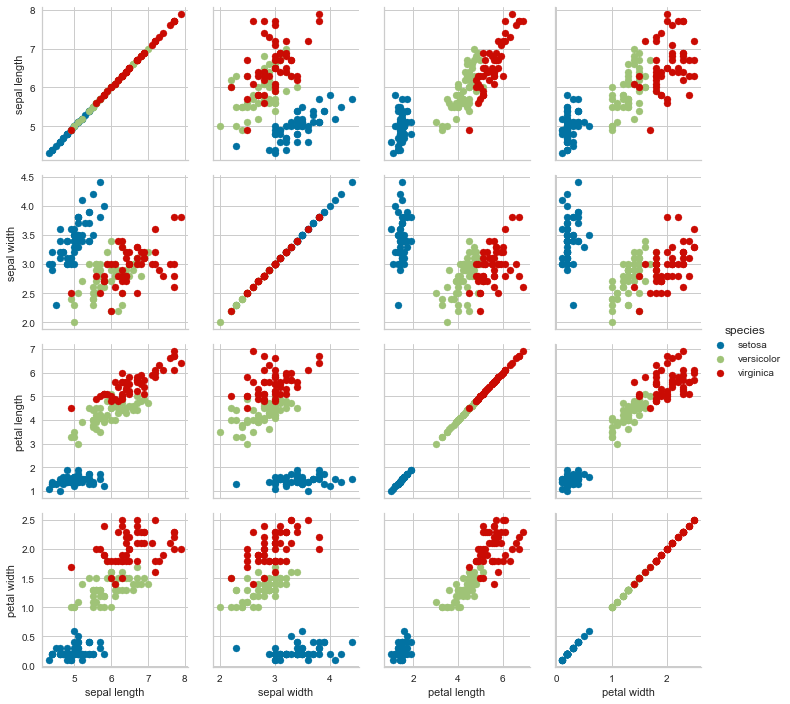

In [178]:
g = sns.PairGrid(iris, vars=["sepal length","sepal width","petal length","petal width"], hue='species')
g.map(plt.scatter)
g.add_legend()

Text(0.5, 0.98, 'Dendorgram Complete')

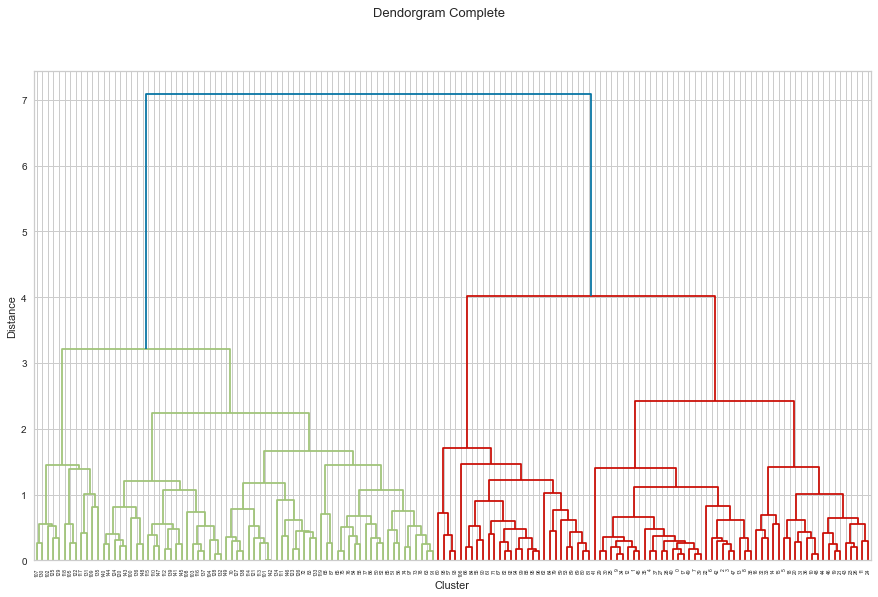

In [179]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
dist_comp = linkage(iris.loc[:, ['sepal length','sepal width','petal length','petal width' ]], method="complete")
plt.figure(figsize=(15, 9))
dendrogram(dist_comp, leaf_rotation=90)
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.suptitle('Dendorgram Complete', fontsize=13)


### A More Readable Dendrogram

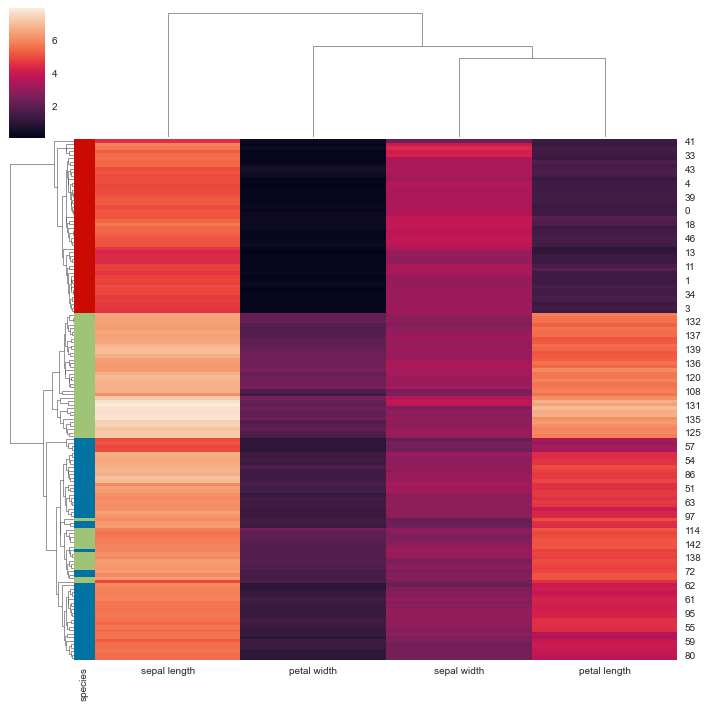

In [180]:
species = iris.pop("species")
species_uniq = dict(zip(species.unique(), "rbg"))
row_colors = species.map(species_uniq)
sns.clustermap(iris, dendrogram_ratio=(.1, .2), row_colors=row_colors)

### Agglomerative Clustering 

The AgglomerativeClustering object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. The linkage criteria determines the metric used for the merge strategy. 
[Link to more info on Agglomerative Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

Text(0.5, 1.0, 'Agglomerative Clustering of Iris Flower (2 Groups)')

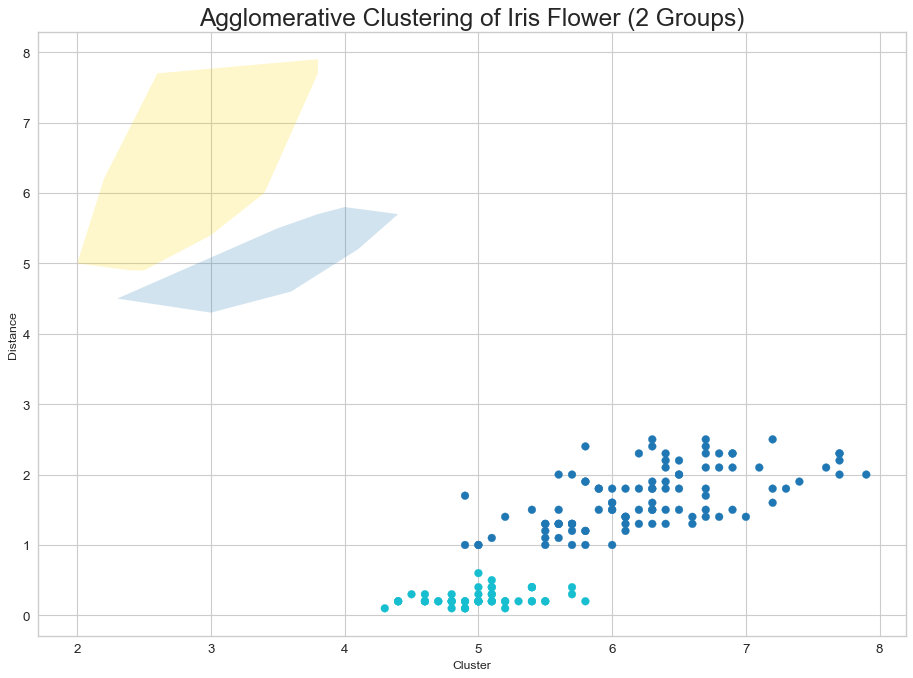

In [181]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=2)

cluster_labels = cluster.fit_predict(iris)  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(iris.iloc[:,0], iris.iloc[:,3], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(iris.loc[cluster.labels_ == 0, 'sepal width'], iris.loc[cluster.labels_ == 0, 'sepal length'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(iris.loc[cluster.labels_ == 1, 'sepal width'], iris.loc[cluster.labels_ == 1, 'sepal length'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
# Decorations
plt.xlabel('Cluster'); plt.xticks(fontsize=12)
plt.ylabel('Distance'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of Iris Flower (2 Groups)', fontsize=22)

### Cluster Conclusion 


The results obtained from using different hierarchal clustering algorithms can vary. Which algorithm to use depends on the grouping criteria between the variables. Using PCA to reduce the cluster groups made the grouping of iris's more identifiable both visually and mathematically verifiable through accuracy, percision, recall, and the F1 score. 

### Just for fun :)

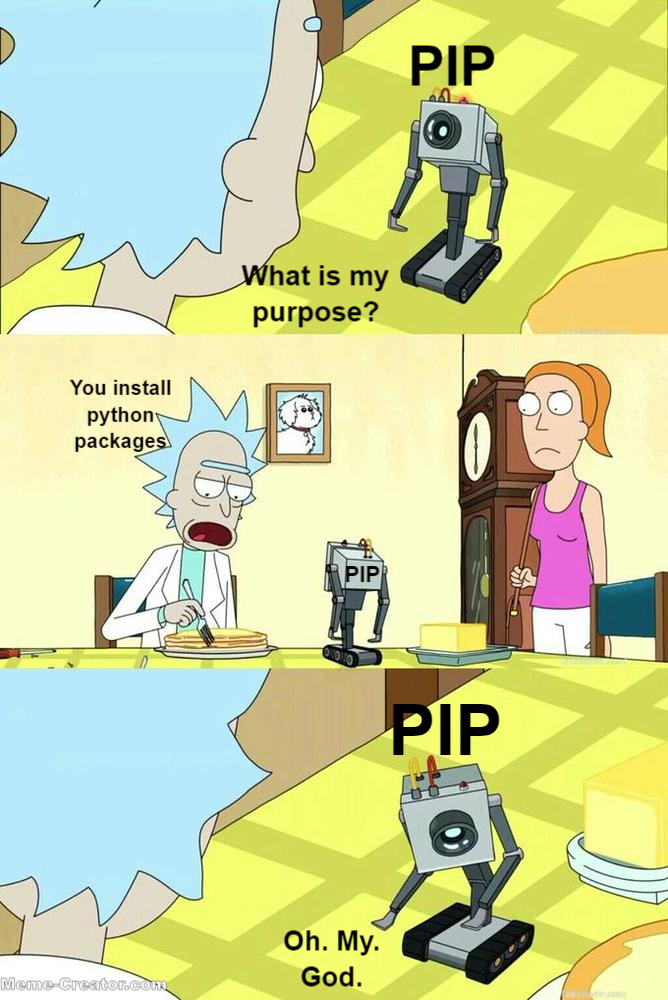